# Regularized Logistic Regression

This notebook makes use of logistic regression to predict whether one should wear a coat outside based on 3 features (temperature, wind speed, and cloud coverage).  
An output of 1 means coat should be put on, and output of 0 means a coat is not needed.  
Uses logistic loss function as cost.  
Weights are regularized to reduce overfitting
Initializes weight and bias using numpy randn function.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Initialize result, temperature, wind speed, and cloud coverage arrays
put_coat_on = np.array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])                # coat = 1 ; no coat = 0
temperature = np.array([65, 12, 71, 68, 88, 54, 62, 13, 44, 72, 26, 59])    # Degrees in F
wind_speed = np.array([1, 8, 3, 4, 9, 12, 0, 5, 12, 6, 3, 0])               # speed in mph
cloud_coverage = np.array([0.1, 0.9, 0.3, 0.0, 0.6, 0.5, 0.0, 1.0, 0.7, 0.2, 0.0, 0.2])    # 0 = no clouds ; 1 = full cloud coverage

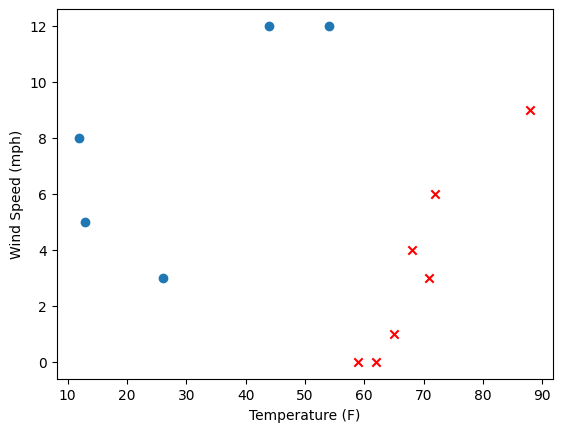

In [7]:
# Graph of temperature and coat classification
coat_on_temp = temperature[put_coat_on == 1]
coat_on_wind = wind_speed[put_coat_on == 1]
coat_off_temp = temperature[put_coat_on == 0]
coat_off_wind = wind_speed[put_coat_on == 0]
plt.scatter(coat_on_temp, coat_on_wind)
plt.scatter(coat_off_temp, coat_off_wind, color='r', marker='x')
plt.xlabel("Temperature (F)")
plt.ylabel("Wind Speed (mph)")
plt.show()

In [8]:
# Scale variables down using using min-max scaling
temp_scaled = np.array([(i-np.min(temperature))/(np.max(temperature)-np.min(temperature)) for i in temperature])
wind_scaled = np.array([(i-np.min(wind_speed))/(np.max(wind_speed)-np.min(wind_speed)) for i in wind_speed])
cloud_scaled = np.array([(i-np.min(cloud_coverage))/(np.max(cloud_coverage)-np.min(cloud_coverage)) for i in cloud_coverage])

In [9]:
# Combine features into one array
# n by 3 array with each element = [temp, wind, cloud]
features = zip(temp_scaled, wind_scaled)
features = np.array(list(features))

n,m = np.shape(features)

In [126]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weight and bias
def set_parameters(num_weights, learn_rate, regularization=0.0):
    weights = np.random.randn(1, num_weights)  # random weights for each feature
    bias = np.random.randn()         # random biases for each training house
    
    return weights, bias


# Calculate ouput using sigmoid function
def activation_function(weights, bias):
    f = np.dot(weights, features.T)
    f = sigmoid(f + bias)
    
    return f


# Calculate cost at each step using logistic loss
def calculate_loss(desired_output, current_output, num_training_examples, weights, regularization_parameter):
    
    cost = -(1/num_training_examples) * np.sum(desired_output * np.log(current_output) + \
           (1-desired_output) * np.log(1-current_output)) + (regularization_parameter/(2*num_training_examples)) * \
           np.sum((weights) ** 2)
    
    return cost


# Calulate value of derivative of cost with respect to weights and biases. Regularization is applied to the weights
def gradient_descent(desired_output, current_output, num_training_examples, features, weights, regularization_parameter):
    delta_weights = (1 / num_training_examples) * np.sum((current_output - desired_output) * features.T, axis=1) + \
                    (regularization_parameter/num_training_examples) * weights
    
    delta_bias = (1 / num_training_examples) * np.sum((current_output - desired_output))
    
    return delta_weights, delta_bias


# Change weights and biases simultaneously according to derivatives and learning rate
def update_weights_bias(weights, bias, delta_weights, delta_bias, learning_rate):
    weights = weights - learning_rate * delta_weights
    bias = bias - learning_rate * delta_bias
    
    return weights, bias


# Brings together all steps for logistic regression and outputs graph of costs, and final weights and biases
def logistic_regression(learning_rate, regularization_parameter, iterations=1000):
    weights, bias = set_parameters(m, learning_rate, regularization_parameter)

    costs = []
    for i in range(iterations):
        f = activation_function(weights, bias)
        costs.append(calculate_loss(put_coat_on, f, n, weights, regularization_parameter))
        
        delta_weights, delta_bias = gradient_descent(put_coat_on, f, n, features, weights, regularization_parameter)
        weights, bias = update_weights_bias(weights, bias, delta_weights, delta_bias, learning_rate)
    
    print(f"Final Cost: {costs[-1]}")
    print(f"Final Weight: {weights}")
    print(f"Final Bias: {bias}")
    
    plt.plot(np.linspace(1,len(costs), len(costs)), costs)
    plt.show()
    
    return weights, bias

Final Cost: 0.5660406333875605
Final Weight: [[-1.16770423  0.83061318]]
Final Bias: -0.08810776869116796


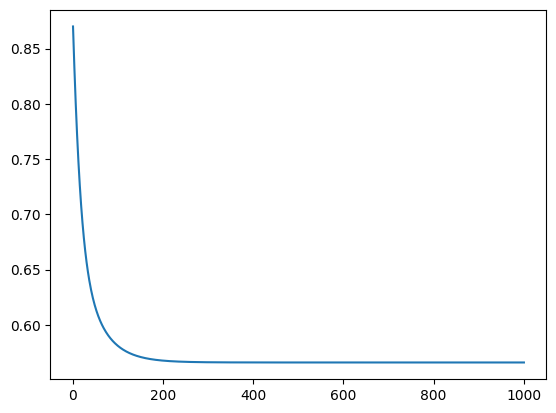

In [127]:
weights, bias = logistic_regression(0.1, 1)

In [114]:
# Get price of house based on any square feet
# Uses prediction made from linear regression model
def coat(temp, wind=0.0, cloud=0.0):
    print(f"Temperature: {temp} F")
    
    temp = (temp-np.min(temperature))/(np.max(temperature)-np.min(temperature))
    wind = (temp-np.min(wind_speed))/(np.max(wind_speed)-np.min(wind_speed))
    cloud = (temp-np.min(cloud_coverage))/(np.max(cloud_coverage)-np.min(cloud_coverage))
    inpt = np.array([[temp], [wind]])
    result = sigmoid(np.dot(weights, inpt) + bias)
    if result >= 0.5:
        print("\nPut coat on\n")
    elif result < 0.5:
        print("\nNo coat necessary\n")
    
    prob_of_coat = 100 * float(result)
    print(f"Chances of putting on coat: {np.round(prob_of_coat, 4)}%")

In [116]:
coat(70)

Temperature: 70 F

No coat necessary

Chances of putting on coat: 28.3594%


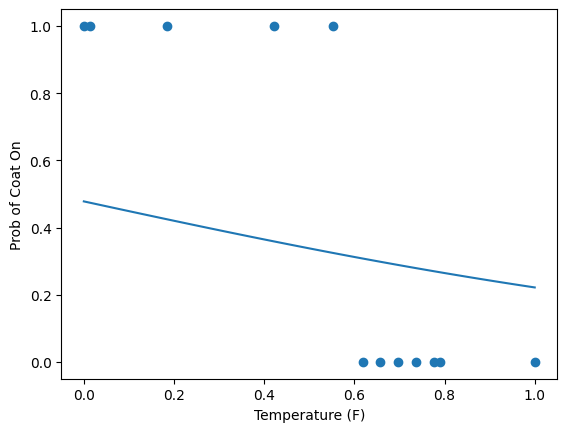

In [123]:
x = np.linspace(np.min(temp_scaled), np.max(temp_scaled), 100)

coat_on_temp = temp_scaled[put_coat_on == 1]
coat_on_wind = wind_scaled[put_coat_on == 1]
coat_off_temp = temp_scaled[put_coat_on == 0]
coat_off_wind = wind_scaled[put_coat_on == 0]
plt.scatter(temp_scaled, put_coat_on)
plt.plot(x, sigmoid(weights[0][0]*x + bias))
plt.xlabel("Temperature (F)")
plt.ylabel("Prob of Coat On")
plt.show()

In [71]:
a = [[1,2,3], [4,5,6]]
print(np.sum(a, axis=1))

[ 6 15]
